# Description of the algorithm

## Loading data
The two datasets are loaded through google drive.

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Testing directory
!ls drive/My\ Drive/ML\ Project/data

project3_dataset1.txt  project3_dataset2.txt


In [3]:
!pip install git+git://github.com/rasbt/mlxtend.git

  Cloning git://github.com/rasbt/mlxtend.git to /tmp/pip-req-build-mhavxb_z
  Running command git clone -q git://github.com/rasbt/mlxtend.git /tmp/pip-req-build-mhavxb_z
  Created wheel for mlxtend: filename=mlxtend-0.18.0-py2.py3-none-any.whl size=1588831 sha256=e5dd7ad3c82ec26db989c1d1032d6428ddafcc45c25b23e7e9fc1375795ef897
  Stored in directory: /tmp/pip-ephem-wheel-cache-h86ts__s/wheels/85/e4/4c/ee71547ac9ea223b07fe8f55b0e5f71536a6a34ae3480205f3
Successfully built mlxtend
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from mlxtend.evaluate import bias_variance_decomp

In [5]:
# Add shortcut of the shared folder into your directory and it works
# Link to answer: https://stackoverflow.com/a/61113429
import_path_1 = 'drive/My Drive/ML Project/data/project3_dataset1.txt'
import_path_2 = 'drive/My Drive/ML Project/data/project3_dataset2.txt'

dataset_1 = pd.read_csv(import_path_1, sep="\t", header=None)
dataset_2 = pd.read_csv(import_path_2, sep="\t", header=None)

In [6]:
# test Dataset 1
dataset_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.024230,0.039500,0.016780,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637,1
1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440,1
2,11.26,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.05588,0.2595,0.06233,0.4866,1.9050,2.877,34.68,0.015740,0.082620,0.080990,0.034870,0.03418,0.006517,11.86,22.33,78.27,437.6,0.1028,0.18430,0.15460,0.09314,0.2955,0.07009,0
3,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,0.05865,0.1759,0.9938,1.143,12.67,0.005133,0.015210,0.014340,0.008602,0.01501,0.001588,12.32,22.02,79.93,462.0,0.1190,0.16480,0.13990,0.08476,0.2676,0.06765,0
4,14.61,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,0.3160,0.9115,1.954,28.90,0.005031,0.006021,0.005325,0.006324,0.01494,0.000895,16.46,21.75,103.70,840.8,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695,0


In [7]:
# test Dataset 2
dataset_2.head()


,0,1,2,3,4,5,6,7,8,9
0,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
1,123,0.05,4.61,13.69,Absent,51,23.23,2.78,16,0
2,128,0.50,3.70,12.81,Present,66,21.25,22.73,28,0
3,114,9.60,2.51,29.18,Absent,49,25.67,40.63,46,0
4,150,0.30,6.38,33.99,Present,62,24.64,0.00,50,0


## Cleaning Datasets

In [8]:
print(dataset_2[4].unique())
# change string 'Present' and 'Absent' to 1 and 0
dataset_2[4] = dataset_2[4].apply(lambda x : 1 if x == 'Present' else (0 if x == 'Absent' else x))
print(dataset_2[4].unique())
dataset_2.head()

['Present' 'Absent']
[1 0]


,0,1,2,3,4,5,6,7,8,9
0,132,6.20,6.47,36.21,1,62,30.77,14.14,45,0
1,123,0.05,4.61,13.69,0,51,23.23,2.78,16,0
2,128,0.50,3.70,12.81,1,66,21.25,22.73,28,0
3,114,9.60,2.51,29.18,0,49,25.67,40.63,46,0
4,150,0.30,6.38,33.99,1,62,24.64,0.00,50,0


# Data Pre-processing
In this section, the data is pre-processed into labels and features

In [9]:
dataset1_features = dataset_1.iloc[:,:-1] # and drop whatever other featuers you dont want to use in your algorithm
dataset1_labels = dataset_1.iloc[:,-1]


In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(dataset1_features, dataset1_labels, test_size=0.20)

In [11]:
# normalize data
# X_train = preprocessing.scale(X_train)
# Check to see if the shapes match
num_pipeline = Pipeline([('std_scaler', StandardScaler())])

X_train = num_pipeline.fit_transform(X_train)
X_test = num_pipeline.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


# Setting up Logistic Regression
We use the library LogisticRegression from sklearn

In [12]:
logisticRegr = LogisticRegression()

## Training Logistic regession

In [13]:
logisticRegr.fit(X_train, y_train, )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Testing Logistic regression

In [14]:
score = logisticRegr.score(X_test, y_test)
score

0.9649122807017544

In [15]:
# Final Logistic regression function
def logisticRegression (X_train, y_train, X_test, y_test, solver='lbfgs', verbose = True, C_val = 1.0):
  # normalise data
  num_pipeline = Pipeline([('std_scaler', StandardScaler())])
  X_train_temp = num_pipeline.fit_transform(X_train)
  X_test_temp = num_pipeline.fit_transform(X_test)
  # setup Logistic Regression
  logisticRegr = LogisticRegression(solver= solver, C = C_val, max_iter= 1000)
  # train 
  logisticRegr.fit(X_train_temp, y_train,)
  scores = cross_val_score(logisticRegr, X_train_temp, y_train, cv=10)
  score = np.mean(scores)
  # score = logisticRegr.score(X_test_temp, y_test)
  if not verbose:
    return score
  # Test and stats:
  print("Train Accuracy:", logisticRegr.score(X_train_temp, y_train))
  print("Test Accuracy:", logisticRegr.score(X_test_temp, y_test))
  print("Cross val Accuracy:", score)
  print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
  y_pred = logisticRegr.predict(X_test_temp)
  print_stats (y_test, y_pred)
  return score

def print_stats (y_test, y_pred):
  # Prints:
  #   - Confusion Matrix 
  #   - Report with: precision, recall, f1-score, support
  #   - AUC score
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print("Classification report:")
  print(classification_report(y_test, y_pred))
  print("AUC score:", roc_auc_score(y_test, y_pred))


In [16]:
logisticRegression(X_train, y_train, X_test, y_test)

Train Accuracy: 0.9934065934065934
Test Accuracy: 0.9649122807017544
Cross val Accuracy: 0.9824637681159419
Accuracy: 0.98 (+/- 0.03)
Confusion Matrix:
[[73  1]
 [ 3 37]]
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        74
           1       0.97      0.93      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

AUC score: 0.9557432432432432


0.9824637681159419

In [17]:
# Dataset 2:
dataset2_features = dataset_2.iloc[:,:-1] # and drop whatever other featuers you dont want to use in your algorithm
dataset2_labels = dataset_2.iloc[:,-1]
X_train2, X_test2, y_train2, y_test2 = train_test_split(dataset2_features, dataset2_labels, test_size=0.20)

In [18]:
logisticRegression(X_train2, y_train2, X_test2, y_test2)

Train Accuracy: 0.7398373983739838
Test Accuracy: 0.7741935483870968
Cross val Accuracy: 0.7152402402402404
Accuracy: 0.72 (+/- 0.10)
Confusion Matrix:
[[53 10]
 [11 19]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        63
           1       0.66      0.63      0.64        30

    accuracy                           0.77        93
   macro avg       0.74      0.74      0.74        93
weighted avg       0.77      0.77      0.77        93

AUC score: 0.7373015873015872


0.7152402402402404

# Tuning Logistic Regression

## Tuning solvers in Logistic Regression

In [19]:
# testing other solvers
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
print('Dataset 1:')
for x in solvers:
  print('Accuracy for', x, ':', logisticRegression(X_train, y_train, X_test, y_test, x, False))

print('Dataset 2:')
for x in solvers:
  print('Accuracy for', x, ':', logisticRegression(X_train2, y_train2, X_test2, y_test2, x, False))


Dataset 1:
Accuracy for newton-cg : 0.9824637681159419
Accuracy for lbfgs : 0.9824637681159419
Accuracy for liblinear : 0.9824637681159419
Accuracy for sag : 0.9824637681159419
Accuracy for saga : 0.9824637681159419
Dataset 2:
Accuracy for newton-cg : 0.7152402402402404
Accuracy for lbfgs : 0.7152402402402404
Accuracy for liblinear : 0.7152402402402404
Accuracy for sag : 0.7152402402402404
Accuracy for saga : 0.7152402402402404


## Tuning C parameter in logistic regression

Dataset 1:
Accuracy for 0.001 : 0.8921256038647343
Accuracy for 0.01 : 0.9493719806763286
Accuracy for 0.1 : 0.9824637681159419
Accuracy for 1 : 0.9824637681159419
Accuracy for 10 : 0.9648309178743961
Accuracy for 100 : 0.9582608695652175
Dataset 2:
Accuracy for 0.001 : 0.6476726726726728
Accuracy for 0.01 : 0.7123873873873874
Accuracy for 0.1 : 0.707057057057057
Accuracy for 1 : 0.7152402402402404
Accuracy for 10 : 0.7097597597597597
Accuracy for 100 : 0.7097597597597597


Text(0, 0.5, 'Accuracy')

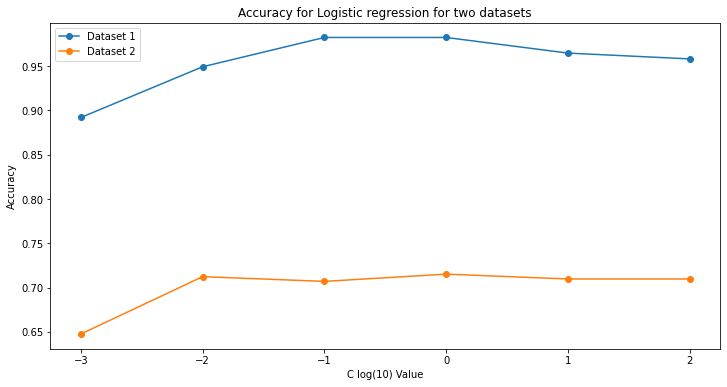

In [20]:
# testing other C values
c_vals = [0.001, 0.01, 0.1, 1, 10, 100]
scores1 = []
scores2 = []
print('Dataset 1:')
for x in c_vals:
  score = logisticRegression(X_train, y_train, X_test, y_test, verbose = False, C_val = x)
  print('Accuracy for', x, ':', score)
  scores1.append(score)

print('Dataset 2:')
for x in c_vals:
  score = logisticRegression(X_train2, y_train2, X_test2, y_test2, verbose = False, C_val = x)
  print('Accuracy for', x, ':', score)
  scores2.append(score)
x = range(-3, 3)
plt.figure(figsize=(12, 6))
plt.plot(x, scores1, marker='o')
plt.plot(x, scores2, marker='o',)
plt.legend(["Dataset 1", "Dataset 2"])
# plt.xticks(np.arange(min(parameters), max(parameters), 1.0))
plt.title('Accuracy for Logistic regression for two datasets')
plt.xlabel('C log(10) Value')
plt.ylabel('Accuracy')

# Bias-Variance Tradeoff
Only looking at `C parameter` since that is only affecting the accuracy. Also all of the results and accuracies are from cross-validation.

In [21]:
def plot_bias_var_tradeoff(parameters, bias, variance, err):
  x = range(-3, 3)
  plt.figure(figsize=(12, 6))
  plt.plot(x, bias, marker='o')
  plt.plot(x, variance, marker='o',)
  plt.plot(x, err, marker='o',)
  plt.legend(["Bias", "Variance", "Error"])
  # plt.xticks(np.arange(min(parameters), max(parameters), 1.0))
  plt.title('Bias-Varaince tradeoff')
  plt.xlabel('C log(10) Value')
  plt.ylabel('Error')

Dataset 1:


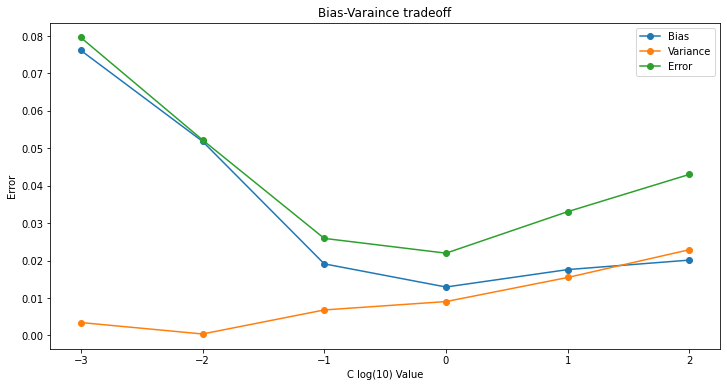

In [22]:
c_vals = [0.001, 0.01, 0.1, 1, 10, 100]
print('Dataset 1:')
bias_1 = []
var_1 = []
err_1 = []
for x in c_vals:
  # normalise data
  num_pipeline = Pipeline([('std_scaler', StandardScaler())])
  X_train_temp = num_pipeline.fit_transform(X_train)
  X_test_temp = num_pipeline.fit_transform(X_test)
  # setup Logistic Regression
  logisticRegr = LogisticRegression(C = x, max_iter= 1000)
  # Predict
  logisticRegr.fit(X_train_temp, y_train)
  mse, bias, var = bias_variance_decomp(logisticRegr, np.array(X_train_temp), np.array(y_train), np.array(X_test_temp), np.array(y_test), loss='mse', num_rounds=200, random_seed=1)
  # Calculate matrices
  bias_1.append(bias)
  var_1.append(var)
  err_1.append(mse)

# plot
plot_bias_var_tradeoff(c_vals, bias_1, var_1, err_1)

# https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/
# https://www.machinecurve.com/index.php/2020/11/02/machine-learning-error-bias-variance-and-irreducible-error-with-python/#bias-error
# http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.evaluate/#bias_variance_decomp

Dataset 2:


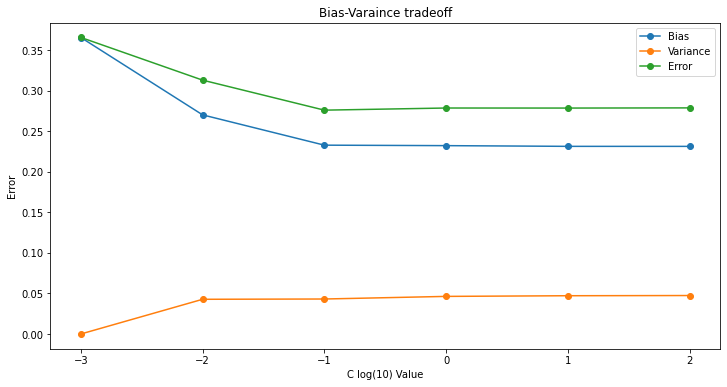

In [23]:
c_vals = [0.001, 0.01, 0.1, 1, 10, 100]
print('Dataset 2:')
bias_1 = []
var_1 = []
err_1 = []
for x in c_vals:
  # normalise data
  num_pipeline = Pipeline([('std_scaler', StandardScaler())])
  X_train_temp = num_pipeline.fit_transform(X_train2)
  X_test_temp = num_pipeline.fit_transform(X_test2)
  # setup Logistic Regression
  logisticRegr = LogisticRegression(C = x, max_iter= 1000)
  # Predict
  logisticRegr.fit(X_train_temp, y_train2)
  mse, bias, var = bias_variance_decomp(logisticRegr, np.array(X_train_temp), np.array(y_train2), np.array(X_test_temp), np.array(y_test2), loss='mse', num_rounds=200, random_seed=1)
  # Calculate matrices
  bias_1.append(bias)
  var_1.append(var)
  err_1.append(mse)

# plot
plot_bias_var_tradeoff(c_vals, bias_1, var_1, err_1)

# https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/
# https://www.machinecurve.com/index.php/2020/11/02/machine-learning-error-bias-variance-and-irreducible-error-with-python/#bias-error
# http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.evaluate/#bias_variance_decomp

# Final results:
For dataset 1, C= 1 and for dataset 2, C = 0.1

In [25]:
logisticRegression(X_train, y_train, X_test, y_test, verbose = True, C_val = 1)


Train Accuracy: 0.989010989010989
Test Accuracy: 0.9824561403508771
Cross val Accuracy: 0.9759420289855072
Accuracy: 0.98 (+/- 0.05)
Confusion Matrix:
[[72  0]
 [ 2 40]]
Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

AUC score: 0.9761904761904762


0.9759420289855072

In [27]:
logisticRegression(X_train2, y_train2, X_test2, y_test2, verbose = True, C_val = 0.1)


Train Accuracy: 0.7398373983739838
Test Accuracy: 0.7311827956989247
Cross val Accuracy: 0.7262762762762762
Accuracy: 0.73 (+/- 0.15)
Confusion Matrix:
[[51  8]
 [17 17]]
Classification report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        59
           1       0.68      0.50      0.58        34

    accuracy                           0.73        93
   macro avg       0.72      0.68      0.69        93
weighted avg       0.72      0.73      0.72        93

AUC score: 0.6822033898305085


0.7262762762762762